# Práctica 3
## Salomón Ramírez

In [1]:
# numerical
import numpy as np
import pandas as pd

# ML
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
#from sklearn.metrics import classification_report

# ML performance metrics
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from sklearn.metrics import confusion_matrix

# timing operations
import time

# plotting
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# imports para poder guardar el output de print a una variable
#import io
#import sys

## Lectura de datos de entrenamiento

In [3]:
tumorTrain = pd.read_csv('train-dataset.csv')

# removemos la primera columna porque es sólo un índice:
tumorTrain=tumorTrain.drop('Unnamed: 0', axis=1) 

# revisamos datos faltantes:
print('Datos faltantes por variable:')
display( tumorTrain.isna().sum()[tumorTrain.isna().sum() != 0])

print()
print('Número total de datos faltantes: {}'.format(tumorTrain.isna().sum().sum()))
print()

print('Filas antes de dropna():',tumorTrain.shape)
# Haremos drop de las filas con datos faltantes:
tumorTrain = tumorTrain.dropna()
print('Filas despues dropna():',tumorTrain.shape)
print()

print('Tumor Train Dataframe:',tumorTrain.shape)
X = tumorTrain.drop('target', axis=1) 
y = tumorTrain['target']
print('Train Data:')
print('X:{},y:{}'.format(X.shape,y.shape))

Datos faltantes por variable:


2     2
4     1
5     1
8     1
9     1
12    1
13    1
15    1
25    2
dtype: int64


Número total de datos faltantes: 11

Filas antes de dropna(): (500, 29)
Filas despues dropna(): (489, 29)

Tumor Train Dataframe: (489, 29)
Train Data:
X:(489, 28),y:(489,)


## Lectura de datos de reto

In [4]:
tumorChallenge = pd.read_csv('datos-prueba.csv')

# removemos la primera columna porque es sólo un índice:
tumorChallenge=tumorChallenge.drop('Unnamed: 0', axis=1) 

# revisamos datos faltantes:
#print('Datos faltantes por variable:')
#display( tumorTest.isna().sum()[tumorTest.isna().sum() != 0])

print()
print('Número total de datos faltantes: {}'.format(tumorChallenge.isna().sum().sum()))
print()

print('Tumor Test Dataframe:',tumorChallenge.shape)
X_challenge = tumorChallenge
# y_challenge = tumorChallenge['target'] # no tenemos etiquetas reales para el reto
print('Challenge Data:')
print('X_challenge:{}'.format(X_challenge.shape))


Número total de datos faltantes: 0

Tumor Test Dataframe: (69, 28)
Challenge Data:
X_challenge:(69, 28)


In [5]:
# veamos los valores mínimos y máximos de cada variable:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.181004,0.020241,0.096808,0.007041,92.448896,0.049964,0.090464,0.003765,892.414315,0.133020,...,0.277971,41.119505,0.116266,661.405726,0.031809,0.084249,0.105830,14.192845,25.850225,0.025758
std,0.027923,0.008118,0.014273,0.003042,24.480729,0.039323,0.079713,0.002459,576.430055,0.023087,...,0.208924,47.284855,0.065724,356.704600,0.026401,0.018279,0.052762,3.553294,6.229986,0.017535
min,0.106000,0.007882,0.052630,0.001713,43.790000,0.000000,0.000000,0.000950,185.200000,0.071170,...,0.000000,6.802000,0.000000,143.500000,0.000000,0.055040,0.019380,6.981000,12.020000,0.002252
25%,0.161900,0.015000,0.086730,0.005212,75.490000,0.020760,0.031020,0.002234,520.500000,0.117000,...,0.121100,17.910000,0.065750,422.900000,0.015560,0.071910,0.066690,11.740000,21.390000,0.013710
50%,0.179100,0.018680,0.096670,0.006380,86.490000,0.034380,0.063870,0.003211,688.600000,0.131500,...,0.236500,24.680000,0.101500,552.400000,0.026310,0.080090,0.095460,13.380000,25.460000,0.020990
75%,0.195300,0.022920,0.105400,0.008124,105.800000,0.074880,0.131900,0.004560,1124.000000,0.146000,...,0.386100,45.500000,0.162500,803.100000,0.042320,0.092150,0.130600,16.110000,30.040000,0.032950
max,0.304000,0.078950,0.163400,0.031130,188.500000,0.201200,0.426800,0.022860,4254.000000,0.222600,...,1.252000,542.200000,0.291000,2501.000000,0.303800,0.207500,0.345400,28.110000,49.540000,0.135400


In [6]:
# algunas variables están en escalas muy diferentes (ver 8, 19,21, por ejemplo). escalemos:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#X_challenge_scaled = scaler.transform(X_challenge)

# comparemos nuevamente los valores mínimos y máximos de cada variable una vez escalados:
display(X.describe())
display(pd.DataFrame(X_scaled).describe())

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.181004,0.020241,0.096808,0.007041,92.448896,0.049964,0.090464,0.003765,892.414315,0.133020,...,0.277971,41.119505,0.116266,661.405726,0.031809,0.084249,0.105830,14.192845,25.850225,0.025758
std,0.027923,0.008118,0.014273,0.003042,24.480729,0.039323,0.079713,0.002459,576.430055,0.023087,...,0.208924,47.284855,0.065724,356.704600,0.026401,0.018279,0.052762,3.553294,6.229986,0.017535
min,0.106000,0.007882,0.052630,0.001713,43.790000,0.000000,0.000000,0.000950,185.200000,0.071170,...,0.000000,6.802000,0.000000,143.500000,0.000000,0.055040,0.019380,6.981000,12.020000,0.002252
25%,0.161900,0.015000,0.086730,0.005212,75.490000,0.020760,0.031020,0.002234,520.500000,0.117000,...,0.121100,17.910000,0.065750,422.900000,0.015560,0.071910,0.066690,11.740000,21.390000,0.013710
50%,0.179100,0.018680,0.096670,0.006380,86.490000,0.034380,0.063870,0.003211,688.600000,0.131500,...,0.236500,24.680000,0.101500,552.400000,0.026310,0.080090,0.095460,13.380000,25.460000,0.020990
75%,0.195300,0.022920,0.105400,0.008124,105.800000,0.074880,0.131900,0.004560,1124.000000,0.146000,...,0.386100,45.500000,0.162500,803.100000,0.042320,0.092150,0.130600,16.110000,30.040000,0.032950
max,0.304000,0.078950,0.163400,0.031130,188.500000,0.201200,0.426800,0.022860,4254.000000,0.222600,...,1.252000,542.200000,0.291000,2501.000000,0.303800,0.207500,0.345400,28.110000,49.540000,0.135400


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.378810,0.173906,0.398825,0.181113,0.336251,0.248331,0.211960,0.128466,0.173814,0.408439,...,0.222022,0.064097,0.399540,0.219684,0.104705,0.191586,0.265168,0.341324,0.368609,0.176539
std,0.141023,0.114230,0.128854,0.103396,0.169171,0.195442,0.186768,0.112223,0.141671,0.152457,...,0.166873,0.088317,0.225855,0.151306,0.086902,0.119895,0.161836,0.168171,0.166044,0.131692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.282323,0.100158,0.307845,0.118945,0.219059,0.103181,0.072680,0.058595,0.082408,0.302648,...,0.096725,0.020747,0.225945,0.118515,0.051218,0.110652,0.145114,0.225235,0.249733,0.086055
50%,0.369192,0.151939,0.397581,0.158650,0.295073,0.170875,0.149649,0.103187,0.123722,0.398402,...,0.188898,0.033392,0.348797,0.173446,0.086603,0.164305,0.233360,0.302854,0.358209,0.140731
75%,0.451010,0.211600,0.476393,0.217935,0.428512,0.372167,0.309044,0.164757,0.230731,0.494156,...,0.308387,0.072279,0.558419,0.279788,0.139302,0.243408,0.341145,0.432060,0.480277,0.230555
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# veamos las variables con standard deviation más alta:
X.describe().loc['std'].sort_values(ascending=False)[:10]

8     576.430055
21    356.704600
19     47.284855
4      24.480729
26      6.229986
15      4.874479
12      4.398828
25      3.553294
11      0.554398
16      0.285239
Name: std, dtype: float64

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']


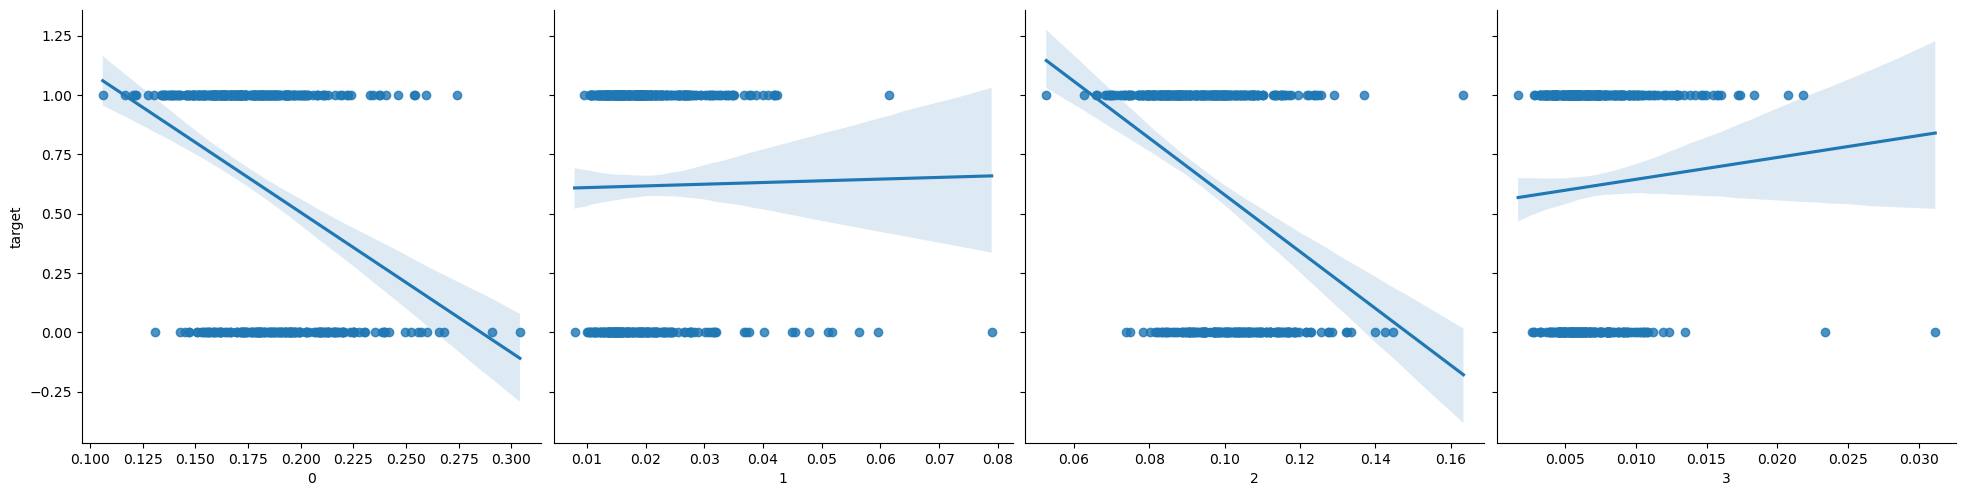

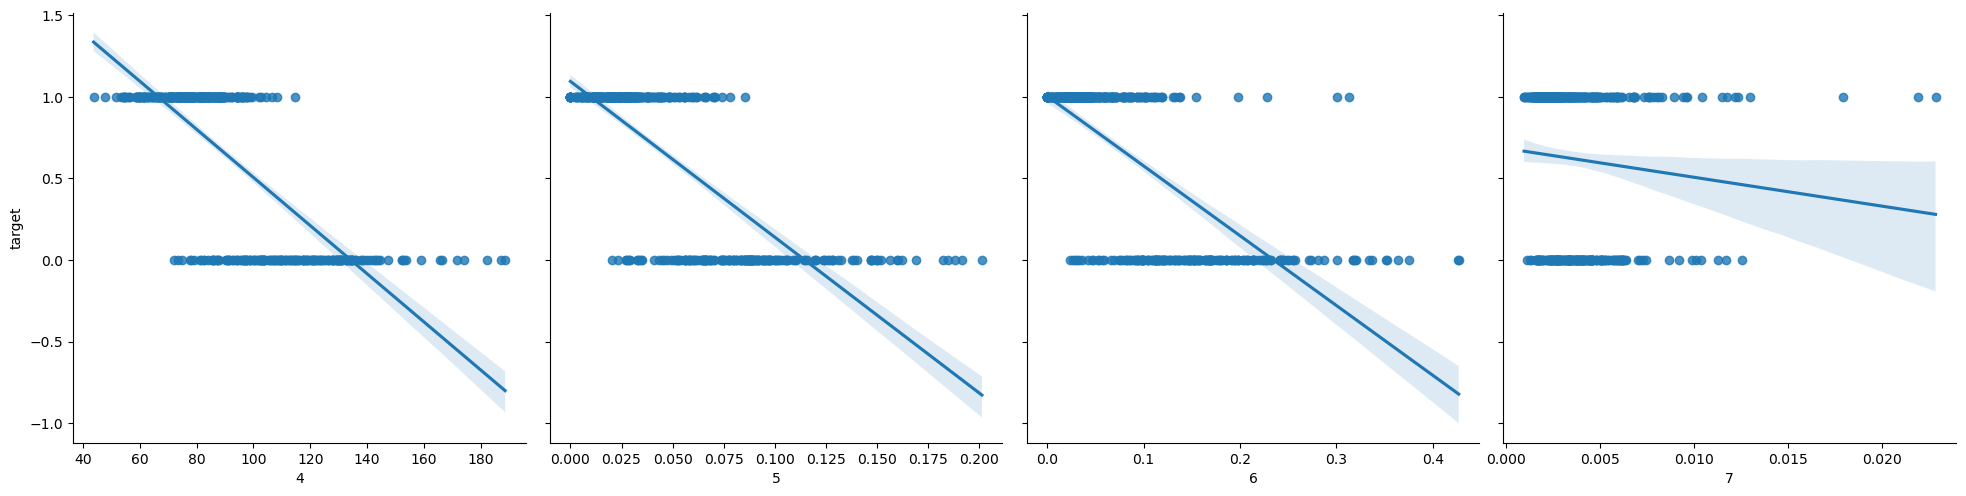

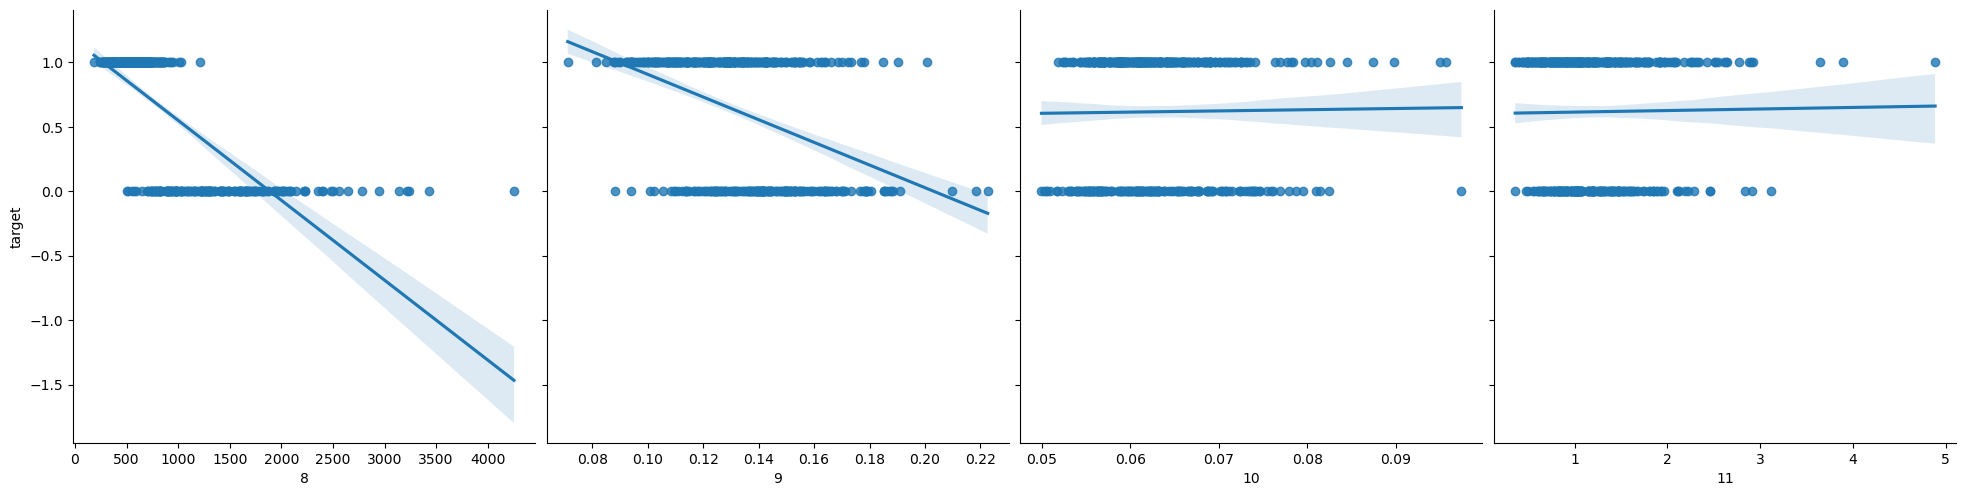

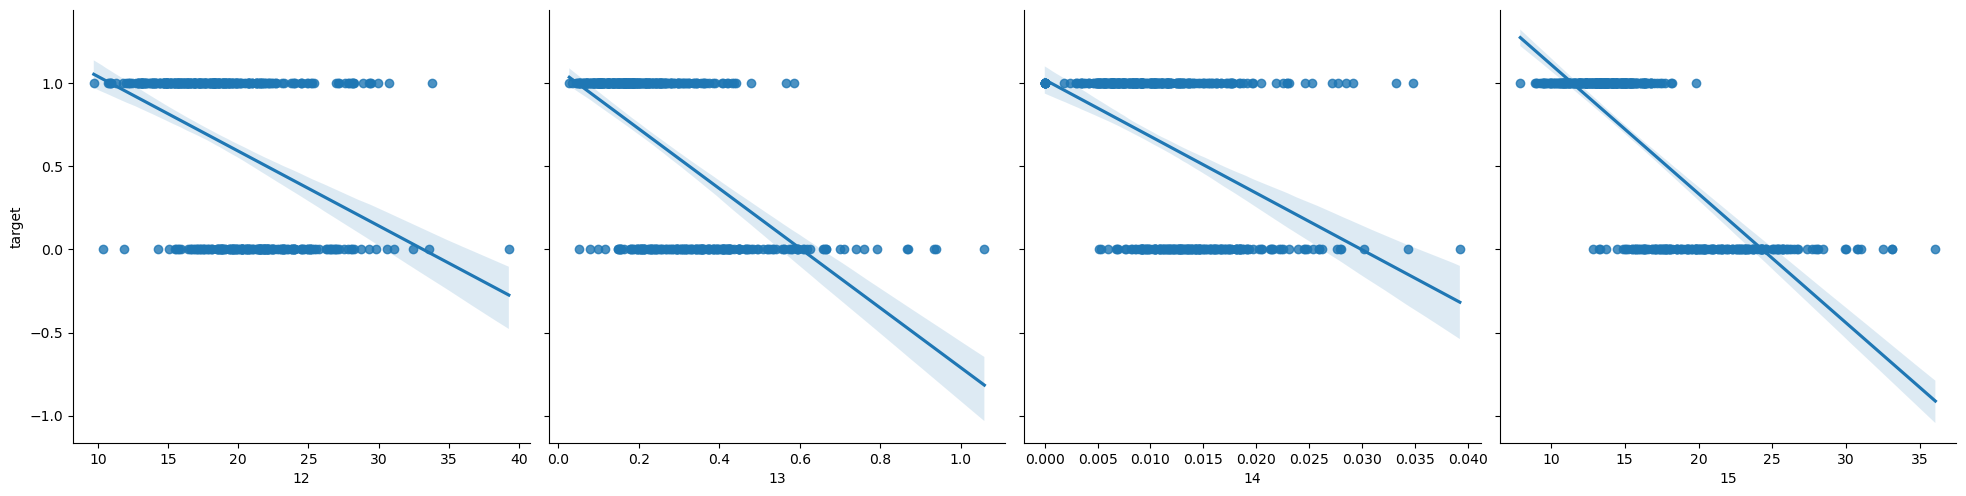

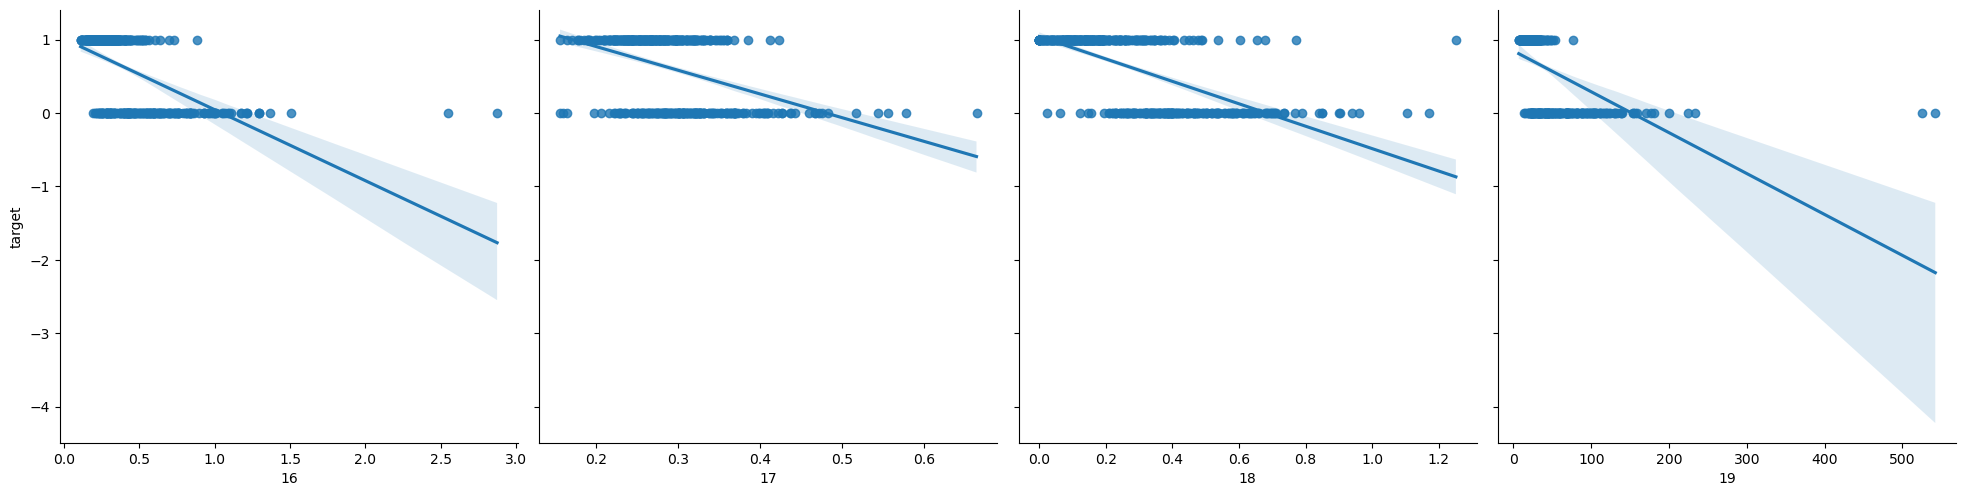

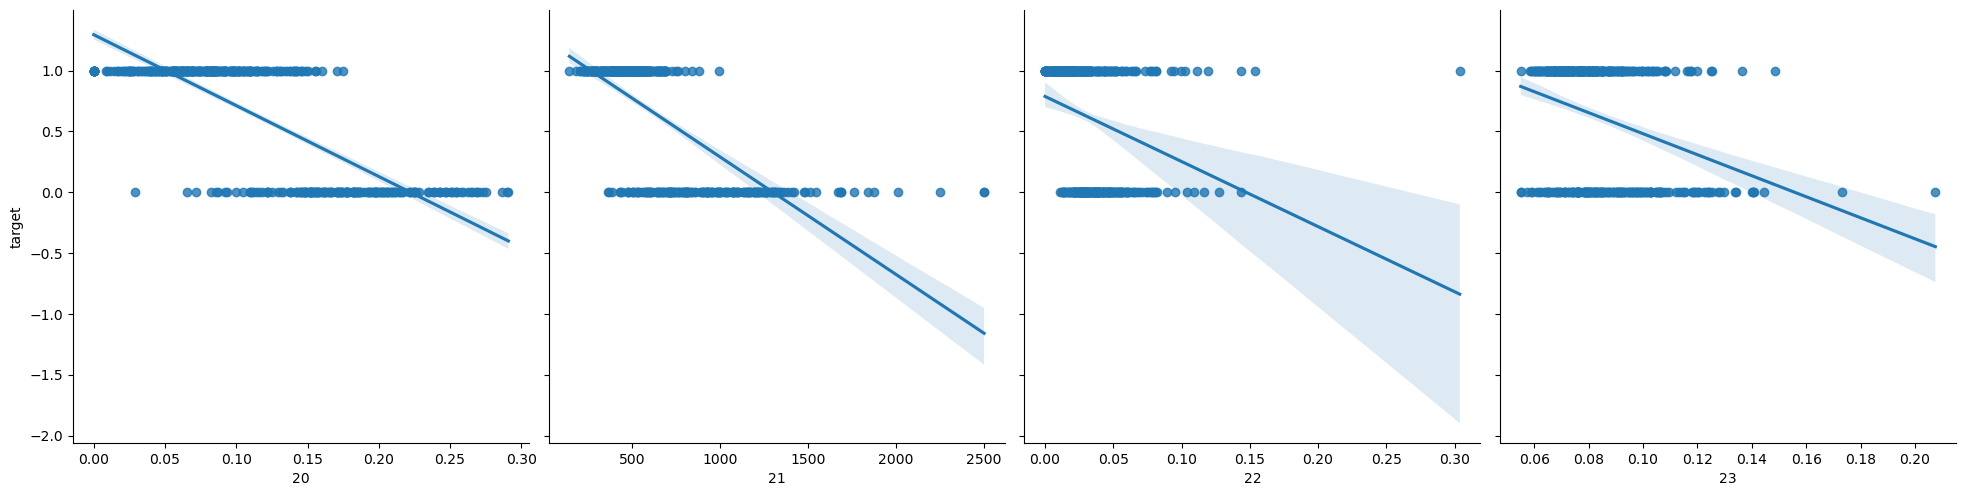

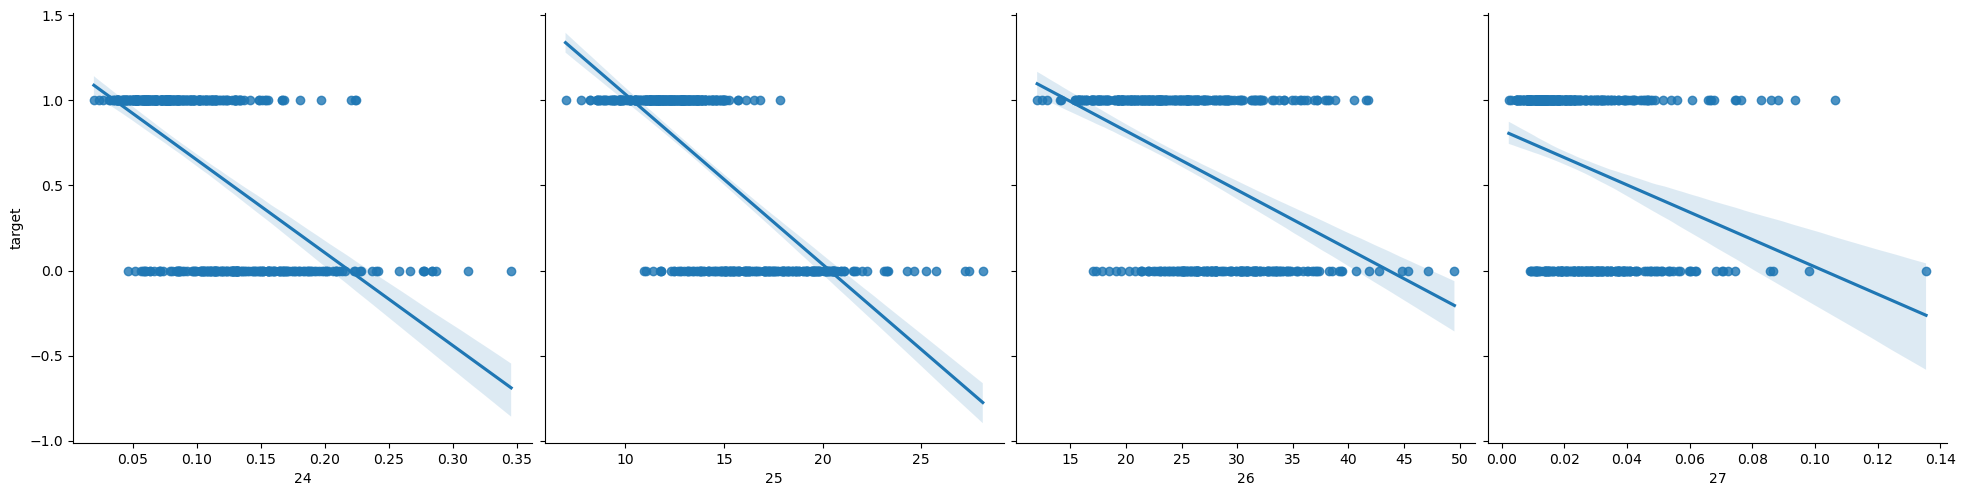

In [8]:
x_vars = list(tumorTrain)
x_vars.remove('target')
print(x_vars)

graphsPerRow = 4

assert len(x_vars) % graphsPerRow == 0,'usa un valor diferente para hacer todas las gráficas'

for i in range(int(len(x_vars)/graphsPerRow)):
    sns.pairplot(tumorTrain, x_vars=x_vars[i*graphsPerRow:i*graphsPerRow+graphsPerRow], y_vars='target', height=5, aspect=1, kind='reg')
    plt.show()


Al parecer hay variables con poca correlación con el valor objetivo. Veamos qué indica PCA...

## Búsqueda de componentes pricipales

Train data luego de reducción de dimensionalidad: (489, 11)
Varianza explicada por cada una de las componentes principales:
[0.51411401 0.17279273 0.07523566 0.06789979 0.04514894 0.03165627
 0.01880628 0.01186856 0.01156968 0.00895625 0.00850197]

Varianza acumulada explicada por cada una de las componentes principales:
[0.51411401 0.68690674 0.7621424  0.83004219 0.87519113 0.9068474
 0.92565368 0.93752224 0.94909192 0.95804817 0.96655014]

El 95% de la varianza se obtiene con 9 componentes principales



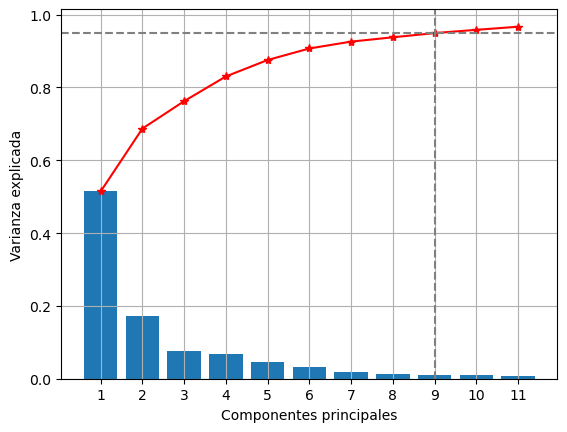

In [9]:
pca = PCA(n_components=11)
X_red = pca.fit_transform(X_scaled)
#X_challenge_red = pca.transform(X_challenge_scaled)

print('Train data luego de reducción de dimensionalidad:',X_red.shape)
#print('Test data luego de reducción de dimensionalidad:',X_challenge_red.shape)

xs = list(range(1, pca.explained_variance_ratio_.shape[0]+1))

plt.bar(xs, pca.explained_variance_ratio_)
plt.xticks(xs)
plt.plot(xs, np.cumsum(pca.explained_variance_ratio_), '-*',color='red')
plt.grid()
plt.xlabel("Componentes principales")
plt.ylabel("Varianza explicada")
print(f"Varianza explicada por cada una de las componentes principales:\n{pca.explained_variance_ratio_}\n")
print(f"Varianza acumulada explicada por cada una de las componentes principales:\n{np.cumsum(pca.explained_variance_ratio_)}\n")

maxPC = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0]
plt.axhline(0.95,color='gray',linestyle='--')
plt.axvline(maxPC,color='gray',linestyle='--')
print(f"El 95% de la varianza se obtiene con {maxPC} componentes principales\n")

## Búsqueda de mejores hiperparámetros

### Spliting en train y test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=71) # 75% training and 25% test
print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  366
X_test:  123
y_train:  366
y_test:  123


### Preparación de pipeline y grid search

In [24]:
SCALER = True
POLY = False
DIMRED = True # si no hacemos dimRed el fitting toma demasiado tiempo
PCA_COMPONENTS = maxPC # que resultó ser 9

# CLASSIFIER /////////////////////(editar para cambiar el clasificador)/////////////////////
#classifier = RandomForestClassifier(n_jobs=-1)
classifier = SVC()
#classifier =  RidgeClassifier()

# SCALER OBJECT
scaler = MinMaxScaler() if SCALER else None
#scaler = StandardScaler()

# POLYNOMIAL FEATURES OBJECT
poly = PolynomialFeatures(include_bias=True) if POLY else None

# DIMENSIONALITY REDUCTION OBJECT
dimRed = PCA(n_components=PCA_COMPONENTS) if DIMRED else None

# parámetros a probar con grid search:

# params for SVM:
if type(classifier) == type(SVC()):
    gridParams = [
        {
            'classifier__C': [.01,.1, 1, 10, 100, 1000],
            'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'classifier__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
            'poly__degree': [1,2,3]
        },
    ]

# params for RandomForest:
if type(classifier) == type(RandomForestClassifier(n_jobs=-1)):
    gridParams = [{}]
    
# params for Linear(Ridge):
if type(classifier) == type(RidgeClassifier()):
    gridParams = [{
        'classifier__alpha':[.01,.1, 1,5,10],
    }]

# quitamos los parámetros que no se utilizarán
newParams = []
for d in gridParams:
    td = d.copy()
    for k in d.keys():
        if 'scaler' in k and not SCALER: del(td[k])
        if 'poly' in k and not POLY: del(td[k])
        if 'dimRed' in k and not DIMRED: del(td[k])
    newParams.append(td)
gridParams = newParams
            

steps=[
    ('scaler',scaler if scaler else 'passthrough'),
    ('dimRed', dimRed if dimRed else 'passthrough'),
    ('poly',poly if poly else 'passthrough'),
    ('classifier',classifier)
]

# quitamos del pipeline los pasos que no utilizaremos
steps = [s for s in steps if s[1]!='passthrough']
pipe = Pipeline(steps=steps)

# instanciamos un objeto de GridSearchCV
grid_search = GridSearchCV(
    estimator = pipe,
    param_grid = gridParams,
    scoring = 'accuracy',
    cv = 5, # incluimos cross validations en el grid search
    n_jobs = -1,
)

print('Steps to run:')
for s in [str(step) for step in pipe.steps]: print('\t',s)


Steps to run:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('classifier', SVC())


In [25]:
# fit the model and time it
start_time = time.time()
grid_search = grid_search.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time
print('Tiempo para fit operations:',duration)

Tiempo para fit operations: 2.424213409423828


--------------------------------------------------
Tiempo para fit operations: 2.424213409423828

The best accuracy using gridSearch is 0.9726767863754165

The best parameters for using this model is {'classifier__C': 100, 'classifier__gamma': 0.2, 'classifier__kernel': 'sigmoid'}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('classifier', SVC())

Train metrics
best score: 0.9781420765027322
best f1 score: 0.9828326180257511
best precision score: 0.9703389830508474
best accuracy: 0.9781420765027322
best recall: 0.9956521739130435

Test metrics
best score: 0.975609756097561
best f1 score: 0.979020979020979
best precision score: 0.9859154929577465
best accuracy: 0.975609756097561
best recall: 0.9722222222222222

--------------------------------------------------


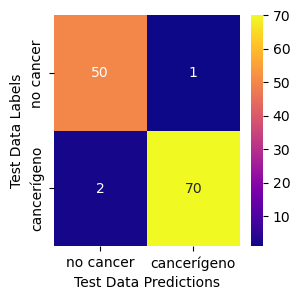

In [26]:
best_model = grid_search.best_estimator_
y_pred_best_parameters = best_model.predict(X_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(50*'-')
print('Tiempo para fit operations:',duration)
print()
print("The best accuracy using gridSearch is", best_accuracy)
print()
print("The best parameters for using this model is", best_parameters)
print('pipeline:')
for s in [str(step) for step in pipe.steps]: print('\t',s)
print()
print('Train metrics')
y_pred_best_parameters = best_model.predict(X_train)
print(f'best score: {best_model.score(X_train,y_train)}')
print(f'best f1 score: {f1_score(y_train, y_pred_best_parameters)}')
print(f'best precision score: {precision_score(y_train, y_pred_best_parameters)}')
print(f"best accuracy: {accuracy_score(y_train, y_pred_best_parameters)}")
print(f"best recall: {recall_score(y_train,y_pred_best_parameters)}")
print()
print('Test metrics')
y_pred_best_parameters = best_model.predict(X_test)
print(f'best score: {best_model.score(X_test,y_test)}')
print(f'best f1 score: {f1_score(y_test, y_pred_best_parameters)}')
print(f'best precision score: {precision_score(y_test, y_pred_best_parameters)}')
print(f"best accuracy: {accuracy_score(y_test,y_pred_best_parameters)}")
print(f"best recall: {recall_score(y_test,y_pred_best_parameters)}")
print()

#print()
#print('Full dataset metrics')
#y_pred_best_parameters = best_model.predict(X)
#print(f'best score: {best_model.score(X,y)}')
#print(f'best f1 score: {f1_score(y, y_pred_best_parameters)}')
#print(f'best precision score: {precision_score(y, y_pred_best_parameters)}')
#print(f"best accuracy: {accuracy_score(y,y_pred_best_parameters)}")
#print(f"best recall: {recall_score(y,y_pred_best_parameters)}")
#print()

if type(classifier) == type(RandomForestClassifier(n_jobs=-1)):
    if SCALER:
        X_train_scaled = scaler.fit_transform(X_train)
        X_train = X_train_scaled
        
    if DIMRED:
        pca = PCA(n_components=maxPC)
        X_train_red = pca.fit_transform(X_train)
        X_train = X_train_red
    
    feature_cols = pd.DataFrame(X_train_red).columns.to_list()
    classifier.fit(X_train,y_train)

    #X = df[feature_cols].values    # Features
    #y = df['label'].values         # Target variable
    
    importances = pd.DataFrame({'feature':feature_cols,'importancia':np.round(classifier.feature_importances_,3)})
    importances.sort_values(by='importancia',ascending=False,inplace=True)
    importances.set_index('feature')
    print(importances)
print(50*'-')

# 0: tumor no cancerígeno
# 1: tumor cancerígeno
target_labels = ['no cancer','cancerígeno']
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred_best_parameters)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels
                  )
s_cm.set(xlabel='Test Data Predictions',ylabel='Test Data Labels')
plt.show()


In [21]:
# Referencia de pruebas hechas:
print(r'''

--------------------------------------------------
The best accuracy using gridSearch is 0.971407532084999

The best parameters for using this model is {'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'linear', 'poly__degree': 2}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('poly', PolynomialFeatures(include_bias=False))
	 ('classifier', SVC())

best score: 0.9754601226993865
best f1 score: 0.9803278688524589
best precision score: 0.9707792207792207

--------------------------------------------------


--------------------------------------------------
The best accuracy using gridSearch is 0.971407532084999

The best parameters for using this model is {'classifier__C': 10, 'classifier__gamma': 0.6, 'classifier__kernel': 'rbf'}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('classifier', SVC())

best score: 0.9775051124744376
best f1 score: 0.9819376026272578
best precision score: 0.9739413680781759

--------------------------------------------------

--------------------------------------------------
The best accuracy using gridSearch is 0.971407532084999

The best parameters for using this model is {'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'linear'}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('poly', PolynomialFeatures(include_bias=False))
	 ('classifier', SVC())

best score: 0.9754601226993865
best f1 score: 0.9803278688524589
best precision score: 0.9707792207792207

--------------------------------------------------


--------------------------------------------------
Tiempo para fit operations: 2.2783098220825195

The best accuracy using gridSearch is 0.972639763050722

The best parameters for using this model is {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('classifier', SVC())

Train metrics
best score: 0.9863387978142076
best f1 score: 0.989247311827957
best precision score: 0.9787234042553191
best accuracy: 0.9863387978142076
best recall: 1.0

Test metrics
best score: 0.975609756097561
best f1 score: 0.9793103448275863
best precision score: 0.9726027397260274
best accuracy: 0.975609756097561
best recall: 0.9861111111111112

--------------------------------------------------



--------------------------------------------------
Tiempo para fit operations: 0.5396926403045654

The best accuracy using gridSearch is 0.9425768233987413

The best parameters for using this model is {}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('classifier', RandomForestClassifier(n_jobs=-1))

Train metrics
best score: 1.0
best f1 score: 1.0
best precision score: 1.0
best accuracy: 1.0
best recall: 1.0

Test metrics
best score: 0.9349593495934959
best f1 score: 0.9428571428571428
best precision score: 0.9705882352941176
best accuracy: 0.9349593495934959
best recall: 0.9166666666666666

   feature  importancia
0        0        0.617
1        1        0.118
2        2        0.073
8        8        0.045
4        4        0.038
6        6        0.032
3        3        0.027
5        5        0.027
7        7        0.024

NOTA: los componentes más importanted coinciden con los que encontró PCA
--------------------------------------------------

--------------------------------------------------
Tiempo para fit operations: 1.5663206577301025

The best accuracy using gridSearch is 0.9452795261014438

The best parameters for using this model is {}
pipeline:
	 ('dimRed', PCA(n_components=9))
	 ('classifier', RandomForestClassifier(n_jobs=-1))

Train metrics
best score: 1.0
best f1 score: 1.0
best precision score: 1.0
best accuracy: 1.0
best recall: 1.0

Test metrics
best score: 0.9349593495934959
best f1 score: 0.943661971830986
best precision score: 0.9571428571428572
best accuracy: 0.9349593495934959
best recall: 0.9305555555555556

   feature  importancia
0        0        0.510
4        4        0.136
2        2        0.090
1        1        0.078
8        8        0.051
3        3        0.043
7        7        0.036
6        6        0.034
5        5        0.022
--------------------------------------------------


--------------------------------------------------
Tiempo para fit operations: 3.6661477088928223

The best accuracy using gridSearch is 0.9726767863754165

The best parameters for using this model is {'classifier__C': 100, 'classifier__gamma': 0.2, 'classifier__kernel': 'sigmoid'}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('classifier', SVC())

Train metrics
best score: 0.9781420765027322
best f1 score: 0.9828326180257511
best precision score: 0.9703389830508474
best accuracy: 0.9781420765027322
best recall: 0.9956521739130435

Test metrics
best score: 0.975609756097561
best f1 score: 0.979020979020979
best precision score: 0.9859154929577465
best accuracy: 0.975609756097561
best recall: 0.9722222222222222

--------------------------------------------------



--------------------------------------------------
Tiempo para fit operations: 8.265145063400269

The best accuracy using gridSearch is 0.9699370603480192

The best parameters for using this model is {'classifier__C': 100, 'classifier__gamma': 0.2, 'classifier__kernel': 'sigmoid', 'poly__degree': 1}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('poly', PolynomialFeatures())
	 ('classifier', SVC())

Train metrics
best score: 0.9617486338797814
best f1 score: 0.9698275862068965
best precision score: 0.9615384615384616
best accuracy: 0.9617486338797814
best recall: 0.9782608695652174

Test metrics
best score: 0.959349593495935
best f1 score: 0.9655172413793104
best precision score: 0.958904109589041
best accuracy: 0.959349593495935
best recall: 0.9722222222222222

--------------------------------------------------

''')



--------------------------------------------------
The best accuracy using gridSearch is 0.971407532084999

The best parameters for using this model is {'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'linear', 'poly__degree': 2}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('poly', PolynomialFeatures(include_bias=False))
	 ('classifier', SVC())

best score: 0.9754601226993865
best f1 score: 0.9803278688524589
best precision score: 0.9707792207792207

--------------------------------------------------


--------------------------------------------------
The best accuracy using gridSearch is 0.971407532084999

The best parameters for using this model is {'classifier__C': 10, 'classifier__gamma': 0.6, 'classifier__kernel': 'rbf'}
pipeline:
	 ('scaler', MinMaxScaler())
	 ('dimRed', PCA(n_components=9))
	 ('classifier', SVC())

best score: 0.9775051124744376
best f1 score: 0.9819376026272578
best precision score: 0.9739413680781759

----

## Predict the Challenge data:

In [15]:
y_pred_best_parameters = best_model.predict(X_challenge)
display(y_pred_best_parameters)
pd.DataFrame(y_pred_best_parameters).to_csv('challenge-prediction.csv')

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0])